# Prediction of Win/Loss of NBA Teams for 2016/2017 using classification.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor 


# Data Manipulation and Formatting

In [118]:
data=pd.read_csv('C:/Users/student/Desktop/NBA/NBA_2016-17_season.csv',header=0)


In [119]:
pd.set_option('display.max_columns', None)

In [120]:
data['Date'] = pd.to_datetime(data['Date'])
data["TeamWin"] = data["TeamWin"].astype('category')



In [123]:
data

,Team,GameNumber,Date,Opponent,Home,TeamWin,TeamScr,OppScr,GameType,Min,Pts,Reb,Ast,Stl,Blk,To,Pf,Dreb,Oreb,Fgm,Fga,fg3m,fg3a,Fg2m,Fg2a,Ftm,Fta,eff
0,Miami,1,2016-10-26,Orlando,0,1,108,96,1,48,108,52,27,5,7,10,22,36,16,47,97,4,16,43,81,10,16,133
1,Golden State,1,2016-10-25,San Antonio,1,0,100,129,1,48,100,35,24,11,6,16,19,27,8,40,85,7,33,33,52,13,18,110
2,Washington,1,2016-10-27,Atlanta,0,0,99,114,1,48,99,40,25,14,4,19,20,28,12,40,94,6,20,34,74,13,18,104
3,Dallas,1,2016-10-26,Indiana,0,0,121,130,1,53,121,49,26,8,8,15,27,39,10,45,104,18,48,27,56,13,18,133
4,Atlanta,1,2016-10-27,Washington,1,1,114,99,1,48,114,52,28,13,7,21,19,38,14,44,88,12,26,32,62,14,18,145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2613,Boston,99,2017-05-23,Cleveland,0,0,99,112,2,48,99,29,26,7,2,12,15,22,7,35,79,10,31,25,48,19,20,106
2614,Cleveland,99,2017-06-09,Golden State,1,1,137,116,2,48,137,41,27,6,3,11,24,30,11,46,87,24,45,22,42,21,31,152
2615,Golden State,99,2017-06-12,Cleveland,1,1,129,120,2,48,129,42,27,8,2,13,24,29,13,46,90,14,38,32,52,23,28,146
2616,Cleveland,100,2017-06-12,Golden State,0,0,120,129,2,48,120,40,22,6,5,14,22,28,12,47,88,11,24,36,64,15,23,130


## Dropping Variables that explain each other
we will some variables since they explian other variables and have high correlations between them.


In [7]:
NBA=data.drop(['Min','Pts','Fgm','fg3m','Fg2m','Ftm','eff'],axis=1)


In [8]:

data1=NBA.sort_values(by=["Team","Opponent"],axis=0)
data1.reset_index(drop=True,inplace=True)


In [9]:
data1

,Team,GameNumber,Date,Opponent,Home,TeamWin,TeamScr,OppScr,GameType,Reb,Ast,Stl,Blk,To,Pf,Dreb,Oreb,Fga,fg3a,Fg2a,Fta
0,Atlanta,39,2017-01-13,Boston,1,0,101,103,1,43,22,5,5,12,17,31,12,83,29,54,21
1,Atlanta,59,2017-02-27,Boston,0,1,114,98,1,55,22,10,10,14,19,42,13,95,25,70,20
2,Atlanta,78,2017-04-06,Boston,1,1,123,116,1,52,26,7,4,17,30,39,13,89,23,66,34
3,Atlanta,38,2017-01-10,Brooklyn,0,1,117,97,1,53,25,11,12,12,17,38,15,92,23,69,38
4,Atlanta,64,2017-03-08,Brooklyn,1,1,110,105,1,47,19,12,7,15,22,36,11,95,20,75,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2613,Washington,3,2016-11-02,Toronto,1,0,103,113,1,36,21,8,5,20,20,30,6,72,10,62,24
2614,Washington,59,2017-03-01,Toronto,0,1,105,96,1,44,32,6,7,12,21,37,7,84,25,59,19
2615,Washington,60,2017-03-03,Toronto,1,0,106,114,1,45,23,8,6,11,21,30,15,92,30,62,32
2616,Washington,57,2017-02-26,Utah,1,0,92,102,1,27,21,16,1,15,27,21,6,87,22,65,13


In [10]:
data1['Index']=np.arange(2618)


In [11]:
data1.tail()

,Team,GameNumber,Date,Opponent,Home,TeamWin,TeamScr,OppScr,GameType,Reb,Ast,Stl,Blk,To,Pf,Dreb,Oreb,Fga,fg3a,Fg2a,Fta,Index
2613,Washington,3,2016-11-02,Toronto,1,0,103,113,1,36,21,8,5,20,20,30,6,72,10,62,24,2613
2614,Washington,59,2017-03-01,Toronto,0,1,105,96,1,44,32,6,7,12,21,37,7,84,25,59,19,2614
2615,Washington,60,2017-03-03,Toronto,1,0,106,114,1,45,23,8,6,11,21,30,15,92,30,62,32,2615
2616,Washington,57,2017-02-26,Utah,1,0,92,102,1,27,21,16,1,15,27,21,6,87,22,65,13,2616
2617,Washington,76,2017-03-31,Utah,0,0,88,95,1,45,12,8,1,14,23,31,14,87,17,70,16,2617


In [12]:
data2=NBA.sort_values(by=["Opponent","Team"],axis=0) 
data2.reset_index(drop=True,inplace=True)


In [13]:
data2['Index']=np.arange(2618)

In [14]:
data2

,Team,GameNumber,Date,Opponent,Home,TeamWin,TeamScr,OppScr,GameType,Reb,Ast,Stl,Blk,To,Pf,Dreb,Oreb,Fga,fg3a,Fg2a,Fta,Index
0,Boston,40,2017-01-13,Atlanta,0,1,103,101,1,43,22,7,2,12,16,34,9,83,44,39,19,0
1,Boston,60,2017-02-27,Atlanta,1,0,98,114,1,40,21,9,7,18,20,31,9,87,34,53,25,1
2,Boston,79,2017-04-06,Atlanta,0,0,116,123,1,38,28,9,4,12,29,28,10,90,43,47,34,2
3,Brooklyn,37,2017-01-10,Atlanta,1,0,97,117,1,48,22,5,4,17,24,34,14,87,29,58,23,3
4,Brooklyn,63,2017-03-08,Atlanta,0,0,105,110,1,40,28,7,11,22,25,35,5,80,34,46,25,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2613,Toronto,4,2016-11-02,Washington,0,1,113,103,1,31,21,16,2,13,24,27,4,77,25,52,25,2613
2614,Toronto,61,2017-03-01,Washington,1,0,96,105,1,50,11,8,3,11,18,34,16,90,20,70,26,2614
2615,Toronto,62,2017-03-03,Washington,0,1,114,106,1,51,16,5,9,17,23,40,11,81,25,56,27,2615
2616,Utah,59,2017-02-26,Washington,0,1,102,92,1,52,18,9,11,24,19,41,11,73,24,49,32,2616


In [15]:

del data2['GameNumber']

del data2['Home']
del data2['TeamWin']
del data2['TeamScr']
del data2['OppScr']
del data2['GameType']




In [16]:
data2.head(10)

,Team,Date,Opponent,Reb,Ast,Stl,Blk,To,Pf,Dreb,Oreb,Fga,fg3a,Fg2a,Fta,Index
0,Boston,2017-01-13,Atlanta,43,22,7,2,12,16,34,9,83,44,39,19,0
1,Boston,2017-02-27,Atlanta,40,21,9,7,18,20,31,9,87,34,53,25,1
2,Boston,2017-04-06,Atlanta,38,28,9,4,12,29,28,10,90,43,47,34,2
3,Brooklyn,2017-01-10,Atlanta,48,22,5,4,17,24,34,14,87,29,58,23,3
4,Brooklyn,2017-03-08,Atlanta,40,28,7,11,22,25,35,5,80,34,46,25,4
5,Brooklyn,2017-03-26,Atlanta,50,21,13,7,17,25,38,12,86,22,64,30,5
6,Brooklyn,2017-04-02,Atlanta,51,21,11,7,19,22,43,8,82,33,49,20,6
7,Charlotte,2016-11-18,Atlanta,44,25,11,4,11,16,36,8,90,29,61,24,7
8,Charlotte,2016-12-17,Atlanta,43,26,8,3,12,17,36,7,88,27,61,13,8
9,Charlotte,2017-03-20,Atlanta,33,28,12,5,7,13,28,5,80,30,50,20,9


In [17]:
## columns of data2
data3=data2.rename(columns={'Reb':'Reb1','Ast':'Ast1','Stl':'Stl1','Blk':'Blk1','To':'To1','Pf':'Pf1','Dreb':'Dreb1','Oreb':'Oreb1','Fga':'Fga1',
                            'fg3a':'fg3a1','Fg2a':'Fg2a1','Fta':'Fta1','Team':'Team1','Opponent':'Opponent1','Date':'Date1'})

In [18]:
data3.head(10)

,Team1,Date1,Opponent1,Reb1,Ast1,Stl1,Blk1,To1,Pf1,Dreb1,Oreb1,Fga1,fg3a1,Fg2a1,Fta1,Index
0,Boston,2017-01-13,Atlanta,43,22,7,2,12,16,34,9,83,44,39,19,0
1,Boston,2017-02-27,Atlanta,40,21,9,7,18,20,31,9,87,34,53,25,1
2,Boston,2017-04-06,Atlanta,38,28,9,4,12,29,28,10,90,43,47,34,2
3,Brooklyn,2017-01-10,Atlanta,48,22,5,4,17,24,34,14,87,29,58,23,3
4,Brooklyn,2017-03-08,Atlanta,40,28,7,11,22,25,35,5,80,34,46,25,4
5,Brooklyn,2017-03-26,Atlanta,50,21,13,7,17,25,38,12,86,22,64,30,5
6,Brooklyn,2017-04-02,Atlanta,51,21,11,7,19,22,43,8,82,33,49,20,6
7,Charlotte,2016-11-18,Atlanta,44,25,11,4,11,16,36,8,90,29,61,24,7
8,Charlotte,2016-12-17,Atlanta,43,26,8,3,12,17,36,7,88,27,61,13,8
9,Charlotte,2017-03-20,Atlanta,33,28,12,5,7,13,28,5,80,30,50,20,9


In [19]:
final_data=pd.merge(data1,data3,on=['Index'])

In [20]:
final_data.head(10)

,Team,GameNumber,Date,Opponent,Home,TeamWin,TeamScr,OppScr,GameType,Reb,Ast,Stl,Blk,To,Pf,Dreb,Oreb,Fga,fg3a,Fg2a,Fta,Index,Team1,Date1,Opponent1,Reb1,Ast1,Stl1,Blk1,To1,Pf1,Dreb1,Oreb1,Fga1,fg3a1,Fg2a1,Fta1
0,Atlanta,39,2017-01-13,Boston,1,0,101,103,1,43,22,5,5,12,17,31,12,83,29,54,21,0,Boston,2017-01-13,Atlanta,43,22,7,2,12,16,34,9,83,44,39,19
1,Atlanta,59,2017-02-27,Boston,0,1,114,98,1,55,22,10,10,14,19,42,13,95,25,70,20,1,Boston,2017-02-27,Atlanta,40,21,9,7,18,20,31,9,87,34,53,25
2,Atlanta,78,2017-04-06,Boston,1,1,123,116,1,52,26,7,4,17,30,39,13,89,23,66,34,2,Boston,2017-04-06,Atlanta,38,28,9,4,12,29,28,10,90,43,47,34
3,Atlanta,38,2017-01-10,Brooklyn,0,1,117,97,1,53,25,11,12,12,17,38,15,92,23,69,38,3,Brooklyn,2017-01-10,Atlanta,48,22,5,4,17,24,34,14,87,29,58,23
4,Atlanta,64,2017-03-08,Brooklyn,1,1,110,105,1,47,19,12,7,15,22,36,11,95,20,75,32,4,Brooklyn,2017-03-08,Atlanta,40,28,7,11,22,25,35,5,80,34,46,25
5,Atlanta,73,2017-03-26,Brooklyn,1,0,92,107,1,58,16,10,3,20,19,32,26,98,27,71,32,5,Brooklyn,2017-03-26,Atlanta,50,21,13,7,17,25,38,12,86,22,64,30
6,Atlanta,77,2017-04-02,Brooklyn,0,0,82,91,1,44,19,9,4,19,19,36,8,80,24,56,23,6,Brooklyn,2017-04-02,Atlanta,51,21,11,7,19,22,43,8,82,33,49,20
7,Atlanta,12,2016-11-18,Charlotte,0,0,96,100,1,49,25,9,6,16,18,41,8,84,28,56,17,7,Charlotte,2016-11-18,Atlanta,44,25,11,4,11,16,36,8,90,29,61,24
8,Atlanta,27,2016-12-17,Charlotte,1,0,99,107,1,47,26,4,2,12,18,38,9,86,26,60,16,8,Charlotte,2016-12-17,Atlanta,43,26,8,3,12,17,36,7,88,27,61,13
9,Atlanta,70,2017-03-20,Charlotte,0,0,90,105,1,45,26,3,6,15,17,33,12,84,37,47,10,9,Charlotte,2017-03-20,Atlanta,33,28,12,5,7,13,28,5,80,30,50,20


In [21]:
final_data.drop_duplicates()

,Team,GameNumber,Date,Opponent,Home,TeamWin,TeamScr,OppScr,GameType,Reb,Ast,Stl,Blk,To,Pf,Dreb,Oreb,Fga,fg3a,Fg2a,Fta,Index,Team1,Date1,Opponent1,Reb1,Ast1,Stl1,Blk1,To1,Pf1,Dreb1,Oreb1,Fga1,fg3a1,Fg2a1,Fta1
0,Atlanta,39,2017-01-13,Boston,1,0,101,103,1,43,22,5,5,12,17,31,12,83,29,54,21,0,Boston,2017-01-13,Atlanta,43,22,7,2,12,16,34,9,83,44,39,19
1,Atlanta,59,2017-02-27,Boston,0,1,114,98,1,55,22,10,10,14,19,42,13,95,25,70,20,1,Boston,2017-02-27,Atlanta,40,21,9,7,18,20,31,9,87,34,53,25
2,Atlanta,78,2017-04-06,Boston,1,1,123,116,1,52,26,7,4,17,30,39,13,89,23,66,34,2,Boston,2017-04-06,Atlanta,38,28,9,4,12,29,28,10,90,43,47,34
3,Atlanta,38,2017-01-10,Brooklyn,0,1,117,97,1,53,25,11,12,12,17,38,15,92,23,69,38,3,Brooklyn,2017-01-10,Atlanta,48,22,5,4,17,24,34,14,87,29,58,23
4,Atlanta,64,2017-03-08,Brooklyn,1,1,110,105,1,47,19,12,7,15,22,36,11,95,20,75,32,4,Brooklyn,2017-03-08,Atlanta,40,28,7,11,22,25,35,5,80,34,46,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2613,Washington,3,2016-11-02,Toronto,1,0,103,113,1,36,21,8,5,20,20,30,6,72,10,62,24,2613,Toronto,2016-11-02,Washington,31,21,16,2,13,24,27,4,77,25,52,25
2614,Washington,59,2017-03-01,Toronto,0,1,105,96,1,44,32,6,7,12,21,37,7,84,25,59,19,2614,Toronto,2017-03-01,Washington,50,11,8,3,11,18,34,16,90,20,70,26
2615,Washington,60,2017-03-03,Toronto,1,0,106,114,1,45,23,8,6,11,21,30,15,92,30,62,32,2615,Toronto,2017-03-03,Washington,51,16,5,9,17,23,40,11,81,25,56,27
2616,Washington,57,2017-02-26,Utah,1,0,92,102,1,27,21,16,1,15,27,21,6,87,22,65,13,2616,Utah,2017-02-26,Washington,52,18,9,11,24,19,41,11,73,24,49,32


In [22]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2618 entries, 0 to 2617
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Team        2618 non-null   object        
 1   GameNumber  2618 non-null   int64         
 2   Date        2618 non-null   datetime64[ns]
 3   Opponent    2618 non-null   object        
 4   Home        2618 non-null   int64         
 5   TeamWin     2618 non-null   category      
 6   TeamScr     2618 non-null   int64         
 7   OppScr      2618 non-null   int64         
 8   GameType    2618 non-null   int64         
 9   Reb         2618 non-null   int64         
 10  Ast         2618 non-null   int64         
 11  Stl         2618 non-null   int64         
 12  Blk         2618 non-null   int64         
 13  To          2618 non-null   int64         
 14  Pf          2618 non-null   int64         
 15  Dreb        2618 non-null   int64         
 16  Oreb        2618 non-nul

## Data tranformation
Because the data collected information based on home and away team with home coded 1 and away code as 0.
Each row contains information of only home team,So the data had to be  transform to include the variables of 
the away team on the same row as the Home team.So to prevent duplication only Home teams will be filtered for the final data.

In [23]:
final_data1=final_data[final_data.Home==1]

In [24]:
playoff=final_data[final_data.GameType==2]

# Data Visualisation

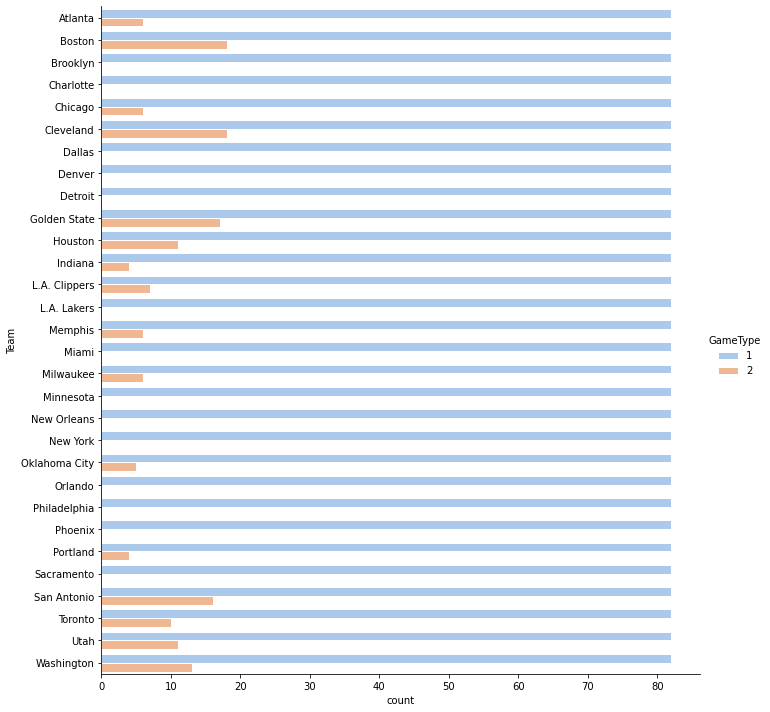

In [127]:
sns.catplot(y="Team", hue="GameType", kind="count",
            palette="pastel", edgecolor="1",data=
            final_data,size=10)

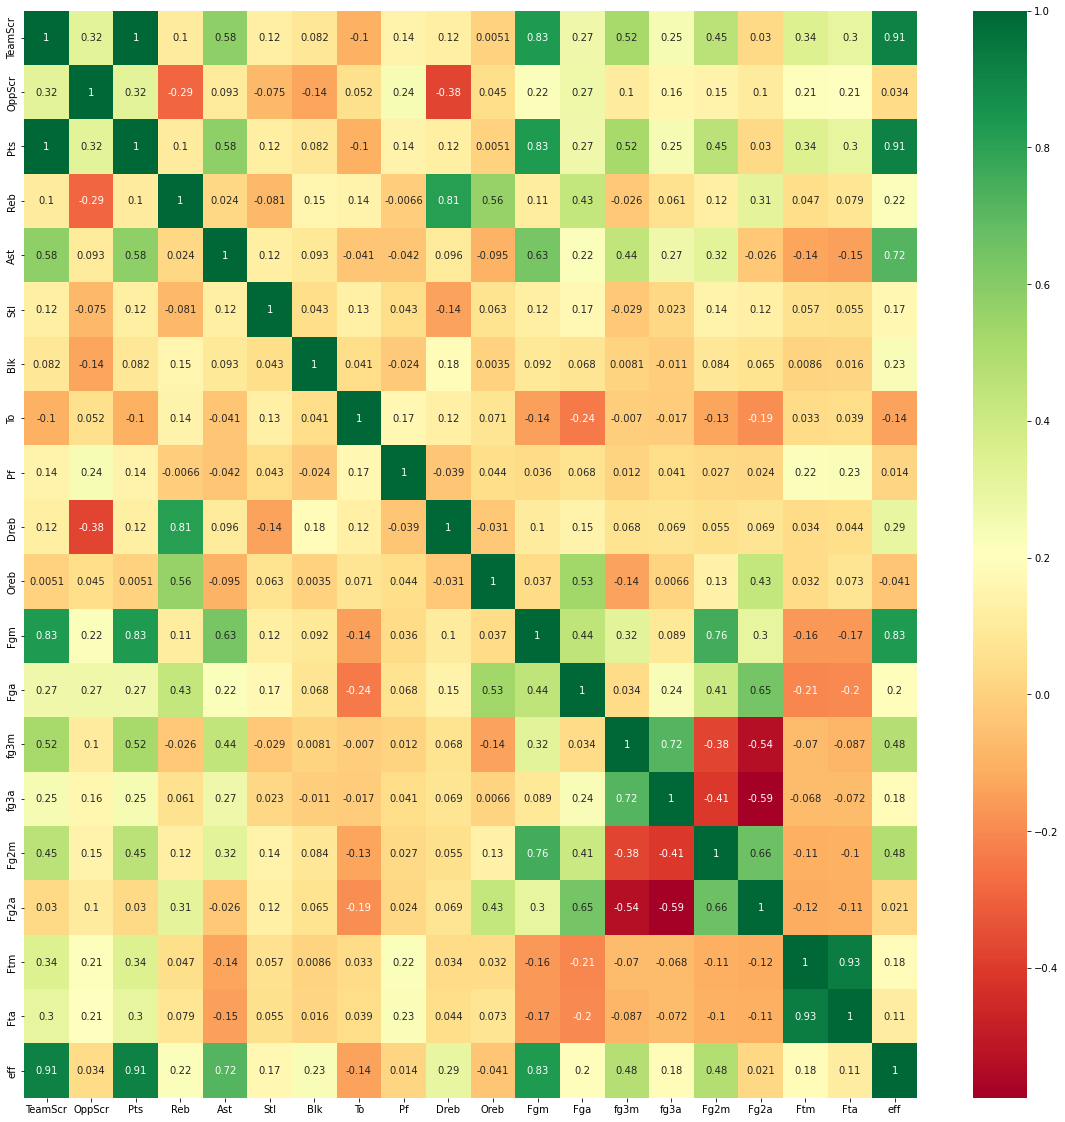

In [71]:
#get correlations of each features in dataset
cor_data=data.drop(['Min','Home','GameType','GameNumber'],axis=1)

corrmat = cor_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(cor_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Modelling of Data

In [26]:

final_data2=final_data1.drop(['Team','GameNumber','Date','Opponent','Home','TeamScr','OppScr','GameType','Team1',
                       'Date1','Opponent1','Index'],axis=1)


In [ ]:
final_data2

## Splitting data 


In [29]:
X=final_data2.drop('TeamWin',axis=1)
y=final_data2["TeamWin"]


In [31]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clr_lr=LogisticRegression()

In [33]:
clr_lr.fit(X_train,y_train)

C:\Users\student\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
y_pred_Lr=clr_lr.predict(X_train)

In [35]:
y_pred_LR=clr_lr.predict(X_test)
y_pred_LR

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [73]:
from sklearn.metrics import confusion_matrix,classification_report)
confusion_matrix(y_train,y_pred_Lr)

array([[366,  73],
       [ 53, 555]], dtype=int64)

In [72]:

confusion_matrix(y_test,y_pred_LR)

array([[ 85,  22],
       [ 20, 135]], dtype=int64)

In [38]:
from sklearn.metrics import precision_score,recall_score,roc_auc_score,accuracy_score




In [39]:
accuracy_score(y_test,y_pred_LR)

0.8396946564885496

In [40]:
recall_score(y_test,y_pred_LR)

0.8709677419354839

In [41]:
precision_score(y_test,y_pred_LR)

0.8598726114649682

In [42]:
roc_auc_score(y_test,y_pred_LR)

0.8326801326499849

## KNN

In [43]:
from sklearn import preprocessing

In [44]:
scaler= preprocessing.StandardScaler().fit(X_train)
X_train_s=scaler.transform(X_train)


In [45]:
scaler= preprocessing.StandardScaler().fit(X_test)
X_test_s=scaler.transform(X_test)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn1=KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train_s,y_train)

KNeighborsClassifier(n_neighbors=1)

In [47]:
accuracy_score(y_test,knn1.predict(X_test_s))

0.6946564885496184

### cross validation

In [48]:
from sklearn.model_selection import GridSearchCV
params={'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
grid_search_cv=GridSearchCV(KNeighborsClassifier(),params)

In [49]:
grid_search_cv.fit(X_train_s,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [50]:
grid_search_cv.best_params_

{'n_neighbors': 10}

In [51]:
knn_best=grid_search_cv.best_estimator_

In [52]:
y_test_pred=knn_best.predict(X_test_s)

In [53]:
accuracy_score(y_test,y_test_pred)

0.7709923664122137

In [70]:
precision_score(y_test,y_test_pred)

0.8064516129032258

In [54]:
confusion_matrix(y_test,y_test_pred)

array([[ 77,  30],
       [ 30, 125]], dtype=int64)

## Random forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
clf_RF=RandomForestClassifier(n_estimators=100)

In [57]:
clf_RF.fit(X_train,y_train)

RandomForestClassifier()

In [58]:
y_pred=clf_RF.predict(X_test)


In [59]:
accuracy_score(y_test,y_test_pred)

0.7709923664122137

In [60]:
recall_score(y_test,y_pred_LR)

0.8709677419354839

In [61]:
precision_score(y_test,y_pred_LR)

0.8598726114649682

### Cross validation

In [75]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [76]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 222, 344, 466, 588, 711, 833, 955, 1077, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [110]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = clf_RF, param_distributions = random_grid, n_iter = 10,cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [111]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=588; total time=   1.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=588; total time=   0.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimato

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 222, 344, 466,
                                                         588, 711, 833, 955,
                                                         1077, 1200]},
                   random_state=42, verbose=2)

In [112]:
rf_random.best_params_

{'n_estimators': 1077,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [113]:
y_test_predcv=rf_random.predict(X_test)

In [114]:
confusion_matrix(y_test,y_test_predcv)

array([[ 72,  35],
       [ 15, 140]], dtype=int64)

In [115]:
accuracy_score(y_test,y_test_predcv)

0.8091603053435115

In [116]:
recall_score(y_test,y_test_predcv)

0.9032258064516129

In [117]:
precision_score(y_test,y_test_predcv)

0.8

## Finding Important features of the model

In [62]:
feature_imp = pd.Series(clf_RF.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

Dreb     0.104163
Ast      0.084483
Dreb1    0.081309
Ast1     0.075044
Reb      0.059005
Reb1     0.047762
To1      0.042584
Stl      0.041441
Fta1     0.035237
Blk      0.033131
To       0.032369
Pf       0.031606
Fga1     0.030958
Fg2a1    0.030364
Fga      0.030003
fg3a1    0.028257
Fta      0.028212
Stl1     0.028161
fg3a     0.027472
Fg2a     0.027447
Oreb1    0.026985
Pf1      0.025458
Oreb     0.025433
Blk1     0.023116
dtype: float64

<AxesSubplot:>

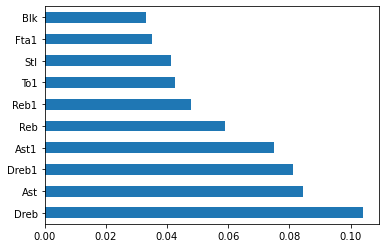

In [69]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(clf_RF.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')